<a href="https://colab.research.google.com/github/yasamankfd/2-functions-With-Thread/blob/master/cifar10_fully_connected_NN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Epoch 1/50
1563/1563 [==============================] - 9s 5ms/step - loss: 1.8776 - accuracy: 0.3248 - val_loss: 1.7115 - val_accuracy: 0.3927
Epoch 2/50
1563/1563 [==============================] - 11s 7ms/step - loss: 1.6771 - accuracy: 0.3984 - val_loss: 1.6468 - val_accuracy: 0.4030
Epoch 3/50
1563/1563 [==============================] - 6s 4ms/step - loss: 1.5912 - accuracy: 0.4295 - val_loss: 1.5864 - val_accuracy: 0.4329
Epoch 4/50
1563/1563 [==============================] - 6s 4ms/step - loss: 1.5460 - accuracy: 0.4474 - val_loss: 1.5269 - val_accuracy: 0.4618
Epoch 5/50
1563/1563 [==============================] - 6s 4ms/step - loss: 1.5117 - accuracy: 0.4585 - val_loss: 1.5161 - val_accuracy: 0.4596
Epoch 6/50
1563/1563 [==============================] - 6s 4ms/step - loss: 1.4789 - accuracy: 0.4711 - val_loss: 1.5102 - val_accuracy: 0.4680
Epoch 7/50
1563/1563 [==============================] - 6s 4ms/step - loss: 1.4576 - accuracy: 0.4799 - val_loss: 1.5159 - val_accuracy

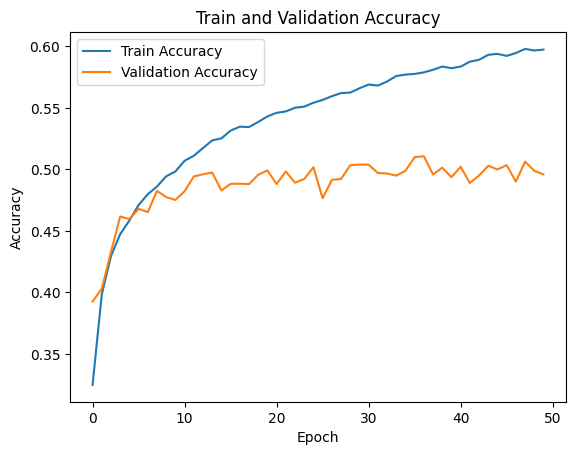

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
import tensorflow as tf
import matplotlib.pylab as plt

# Load the CIFAR-10 dataset
from tensorflow.keras.datasets import cifar10

(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Preprocess the data
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# One-hot encode the labels
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

# Define the model
model = Sequential()
model.add(Flatten(input_shape=(32, 32, 3)))
model.add(Dense(512, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))

# Compile the model
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# Train the model
history = model.fit(x_train, y_train, epochs=50, batch_size=32, validation_data=(x_test, y_test))
# overfitting_hist = model.fit(x_train, y_train,epochs=5,batch_size=32,validation_data=(x_test,y_test),use_multiprocessing=True)


# Evaluate the model
loss, accuracy = model.evaluate(x_test, y_test)
print('Test accuracy:', accuracy)

train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

# Plot the training and validation accuracy
plt.plot(train_acc, label='Train Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.title('Train and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


Epoch 1/50
1563/1563 [==============================] - 12s 7ms/step - loss: 1.9758 - accuracy: 0.2656 - val_loss: 1.7795 - val_accuracy: 0.3472
Epoch 2/50
1563/1563 [==============================] - 10s 7ms/step - loss: 1.7436 - accuracy: 0.3656 - val_loss: 1.6930 - val_accuracy: 0.3873
Epoch 3/50
1563/1563 [==============================] - 7s 5ms/step - loss: 1.6560 - accuracy: 0.4007 - val_loss: 1.5988 - val_accuracy: 0.4287
Epoch 4/50
1563/1563 [==============================] - 6s 4ms/step - loss: 1.5979 - accuracy: 0.4230 - val_loss: 1.5562 - val_accuracy: 0.4416
Epoch 5/50
1563/1563 [==============================] - 7s 5ms/step - loss: 1.5513 - accuracy: 0.4413 - val_loss: 1.5418 - val_accuracy: 0.4501
Epoch 6/50
1563/1563 [==============================] - 7s 5ms/step - loss: 1.5168 - accuracy: 0.4556 - val_loss: 1.5394 - val_accuracy: 0.4475
Epoch 7/50
1563/1563 [==============================] - 8s 5ms/step - loss: 1.4860 - accuracy: 0.4678 - val_loss: 1.4940 - val_accurac

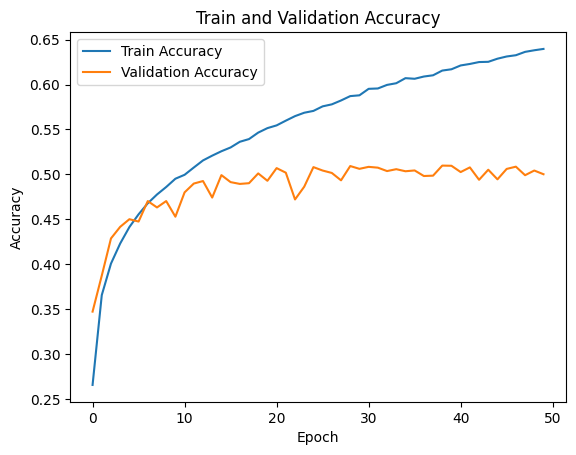

In [ ]:
model2 = Sequential()
model2.add(Flatten(input_shape=(32, 32, 3)))
model2.add(Dense(512, activation='relu'))
model2.add(Dense(128, activation='relu'))
model2.add(Dense(64, activation='relu'))
model2.add(Dense(32, activation='relu'))
model2.add(Dense(16, activation='relu'))
model2.add(Dense(10, activation='softmax'))

# Compile the model
model2.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# Train the model
history = model2.fit(x_train, y_train, epochs=50, batch_size=32, validation_data=(x_test, y_test))


# Evaluate the model
loss, accuracy = model2.evaluate(x_test, y_test)
print('Test accuracy:', accuracy)

train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

# Plot the training and validation accuracy
plt.plot(train_acc, label='Train Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.title('Train and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

دو مدل با شبکه های فولی کانکتد با تعداد لایه های مختلف و تعداد نرون های مختلف ترین شدند.تعداد 50 ایپاک برای هر دو مدل انجام شد .اما دقت مدل روی دیتای ترین به بالاتر از0.6 نرسید. میبینیم که در هر دو مدل تقریبا از ایپاک 10 به بعد دقت روی دیتای تست بهبود نمی یابد درحالیکه دقت روی دیتای ترین صعود کرده. و احتمالا اورفیت اتفاق افتاده است.